In [244]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M  # https://docs.python.org/2/library/math.html

# Simple, conceptual model of marginal sea

In [245]:
#### Constants #####
L_x = 1000000 #zonal extent [m]
L_y = 2000000 #meridional extent [m]
A = L_x*L_y #surface area of interior [m^2] Note that the interior is probably smaller than this
P = 2*L_x+2*L_y #Perimeter [m]

g = 9.81 #gravitational acceleration [m/s^2]
C_p = 3994 #specific heat capacity of sea water [J/(kg K)] source: Steffie's paper
alpha = 0.2 #thermal expansion coefficient [kg m^-3 C^-1] source: Steffie's paper
c = 0.006 #bottom slope coefficient
s = 0.02 #average bottom slope around the perimeter of the marginal sea

#### Parameters ####
H = 1000 #sill height [m]
f_0 = 1.2e-4 #Coriolis parameter [s^-1]
Gamma = 20 #Restoring strength [W/(m^2 C)]

L = H/s #width of sloping topography of the boundary current [m]
T_1 = 8.87 #ingoing temperature [Celsius]
T_A = 2.8 #Atmospheric temperature [Celsius]
ro_0 = 1028  #density sea water [kg m^-3]. Range of 7 to 9 degrees of sea water
#h_1 = ... #thickness upper layer [m]

#### functions ####
epsilon = c*P/L #ratio of heat fluxed into interior by eddies compared to heat flux by advection into the basin in the inflowing boundary current [-]
#mu = 0.15*epsilon
mu = A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)) #[-]

In [246]:
#### Two main equations #####

#Interior temperature [Celsius]
T_0 = T_1 - (mu/epsilon)*(M.sqrt(1+2*epsilon/mu)-1)*(T_1 - T_A)

#Outflowing temperature [Celsius]
T_out = T_1 - 2*mu*((T_1-T_A)/(T_1-T_0)*(1+P*L/A)-1)*(T_1-T_A)


In [247]:
#### Follow up computations ####

#Velocity in boundary current [m/s]
V_1 = alpha*g*H*(T_1-T_0)/(2*ro_0*f_0*L)

#effective perimeter [m]
#P_e = ... #[m] -> Not sure if we have to use this, and then how to determine it?

#Atmospheric heat flux/meridional heat transport at the sill [W/m^2]
Q_star = A*(T_0 - T_A)*Gamma + P*L*Gamma*(T_1-T_A)


#Fraction of outflowing waters that include inflowing water [-]
Delta = (T_out-T_0)/(T_1-T_0)

#Downwelling/Medidional overturning strength at the sill [m^2/s]
W = alpha*g*H**2*(T_1-T_0)/(4*ro_0*f_0)*(1-Delta)

In [248]:
print(T_0)
print(T_out)
print(V_1)
print(mu)
print(epsilon)
print(mu/epsilon)
print(Q_star)
print(W)

6.396313715201073
6.638025874832346
0.3934316221445764
0.1009126201834933
0.72
0.14015641692151848
180272548608042.9
8874702.564808154


In [249]:
#ranges of H

#H = np.arange(400,2000,100)
#f_0 = np.arange(0.5,3,0.5)
#Gamma = np.arange(5,125,10)

H = 1000
T_0 = np.zeros(16)
T_0 = T_1 - ((A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))/epsilon)*(M.sqrt(1+2*epsilon/(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A))))-1)*(T_1 - T_A)
T_0H = np.zeros(16)
T_outH = np.zeros(16)
k=np.arange(16)
k=0

for H in range(400,2000,100):
    T_0H[k] = T_1 - ((A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))/epsilon)*(M.sqrt(1+2*epsilon/(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A))))-1)*(T_1 - T_A)
    T_outH[k] = T_1 - 2*(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))*((T_1-T_A)/(T_1-T_0)*(1+P*L/A)-1)*(T_1-T_A)
    k=k+1

print(T_0H)
print(T_outH) #T_out shouldn't be negative

[4.55271153 5.00025503 5.37880629 5.69784041 5.96790363 6.19822716
 6.39631372 6.56810849 6.71829334 6.85056348 6.96785328 7.07251124
 7.16643288 7.25116129 7.32796309 7.39788631]
[-5.07983828 -0.0578965   2.67007187  4.31495076  5.38254043  6.11447639
  6.63802587  7.02539328  7.32001797  7.54930525  7.73123769  7.8780115
  7.99813511  8.09769061  8.1811191   8.25172462]


In [250]:
#ranges of f0

#H = np.arange(400,2000,100)
#f_0 = np.arange(0.5,3,0.5)
#print(len(f_0))
#Gamma = np.arange(5,125,10)

f_0 = 1.2e-4
T_0 = np.zeros(5)
T_0 = T_1 - ((A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))/epsilon)*(M.sqrt(1+2*epsilon/(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A))))-1)*(T_1 - T_A)
T_0f = np.zeros(5)
T_outf = np.zeros(5)
k=np.arange(5)
k=0

for f_0 in range(1e-4,3e-4):
    T_0f[k] = T_1 - ((A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))/epsilon)*(M.sqrt(1+2*epsilon/(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A))))-1)*(T_1 - T_A)
    T_outf[k] = T_1 - 2*(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))*((T_1-T_A)/(T_1-T_0)*(1+P*L/A)-1)*(T_1-T_A)
    k=k+1

print(T_0f)
print(T_outf) #T_out shouldn't be negative

TypeError: 'float' object cannot be interpreted as an integer

In [251]:
#ranges of Gamma

#H = np.arange(400,2000,100)
#f_0 = np.arange(0.5,3,0.5)
#Gamma = np.arange(5,125,10)
#print(len(Gamma))

Gamma = 20
T_0 = np.zeros(12)
T_0 = T_1 - ((A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))/epsilon)*(M.sqrt(1+2*epsilon/(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A))))-1)*(T_1 - T_A)
T_0gamma = np.zeros(12)
T_outgamma = np.zeros(12)
k=np.arange(12)
k=0

for Gamma in range(5,125,10):
    T_0gamma[k] = T_1 - ((A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))/epsilon)*(M.sqrt(1+2*epsilon/(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A))))-1)*(T_1 - T_A)
    T_outgamma[k] = T_1 - 2*(A*Gamma*f_0/(alpha*g*C_p*H**2*(T_1-T_A)))*((T_1-T_A)/(T_1-T_0)*(1+P*L/A)-1)*(T_1-T_A)
    k=k+1

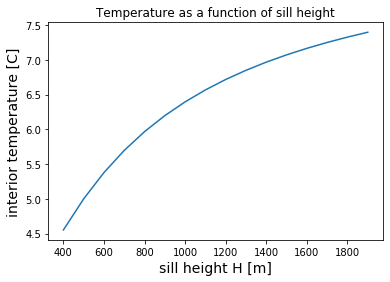

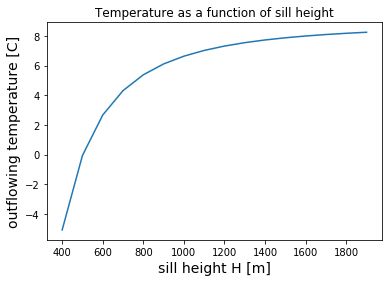

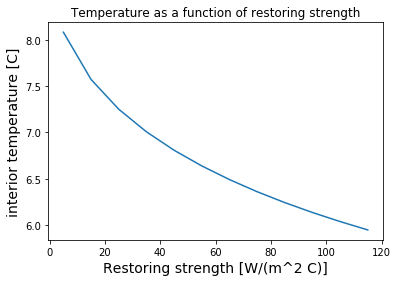

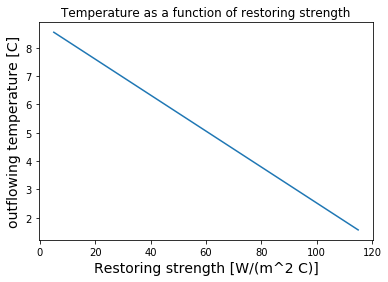

In [255]:
#Plots for different ranges of the parameters

H = np.arange(400,2000,100)
f_0 = np.arange(0.5,3,0.5)
Gamma = np.arange(5,125,10)

plt.plot(H,T_0H)
plt.xlabel('sill height H [m]', fontsize=14) # label along x-axes
plt.ylabel('interior temperature [C]', fontsize=14) # label along x-axes
plt.title('Temperature as a function of sill height') # Title at top of plot
plt.show()

plt.plot(H,T_outH)
plt.xlabel('sill height H [m]', fontsize=14) # label along x-axes
plt.ylabel('outflowing temperature [C]', fontsize=14) # label along x-axes
plt.title('Temperature as a function of sill height') # Title at top of plot
plt.show()

plt.plot(Gamma,T_0gamma)
plt.xlabel('Restoring strength [W/(m^2 C)]', fontsize=14) # label along x-axes
plt.ylabel('interior temperature [C]', fontsize=14) # label along x-axes
plt.title('Temperature as a function of restoring strength') # Title at top of plot
plt.show()

plt.plot(Gamma,T_outgamma)
plt.xlabel('Restoring strength [W/(m^2 C)]', fontsize=14) # label along x-axes
plt.ylabel('outflowing temperature [C]', fontsize=14) # label along x-axes
plt.title('Temperature as a function of restoring strength') # Title at top of plot
plt.show()


